In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# O que este comando faz?

sns.set_style('whitegrid')

In [4]:
# o que o parse faz?

df_train = pd.read_csv('train.csv', nrows=200000, parse_dates=['pickup_datetime'])

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                200000 non-null  object             
 1   fare_amount        200000 non-null  float64            
 2   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   200000 non-null  float64            
 4   pickup_latitude    200000 non-null  float64            
 5   dropoff_longitude  199999 non-null  float64            
 6   dropoff_latitude   199999 non-null  float64            
 7   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 12.2+ MB


In [6]:
# O que o comando describe faz?

df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.342877,-72.506121,39.922326,-72.518673,39.925579,1.682445
std,9.837855,11.608097,10.048947,10.724226,6.751120,1.306730
min,-44.900000,-736.550000,-3116.285383,-1251.195890,-1189.615440,0.000000
25%,6.000000,-73.992050,40.735007,-73.991295,40.734092,1.000000
50%,8.500000,-73.981743,40.752761,-73.980072,40.753225,1.000000
75%,12.500000,-73.967068,40.767127,-73.963508,40.768070,2.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000


In [7]:
df_train.dtypes

key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

## Data Pre-processing

### Minimum Fare-Amount is Negative, so we have to remove this observations

In [8]:
len(df_train)

200000

In [9]:
df_train = df_train[df_train['fare_amount'] >= 0]

In [10]:
len(df_train)

199987

In [11]:
df_train[df_train['fare_amount'] > 0]['fare_amount']

0          4.50
1         16.90
2          5.70
3          7.70
4          5.30
          ...  
199995     8.90
199996    14.10
199997     6.90
199998    18.00
199999    42.83
Name: fare_amount, Length: 199982, dtype: float64

### Histogram of fare amount

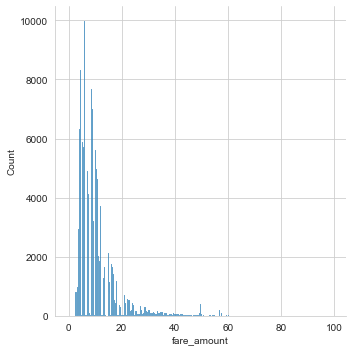

In [12]:
# para que usarmos um Histograma

sns.displot(df_train[df_train['fare_amount'] < 100]['fare_amount'], kde=False)

#### **Notice - small spikes between $40 and $60**

## Remove Missing Data

In [13]:
df_train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [14]:
# o que faz o comando how?

df_train = df_train.dropna(how='any', axis='rows')

In [15]:
len(df_train)

199986

In [16]:
df_test = pd.read_csv('test.csv')

In [17]:
df_test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [18]:
df_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [19]:
latitude = 40.7141667
longitude = -74.0063889

### **NewYork City coordinates are [https://www.travelmath.com/cities/New+York,+NY](https://www.travelmath.com/cities/New+York,+NY)**

This will help us to make sure to train a model for the full pickup/dropoff co-ordinate range for the test set.

In [20]:
# O que é um bounding box?

### Minimum and Maximum Longitude Test set

In [21]:
# como é o retorno da função min()?

print(min(df_test['pickup_longitude'].min(), df_test['dropoff_longitude'].min()))

-74.263242


In [22]:
print(max(df_test['pickup_longitude'].max(), df_test['dropoff_longitude'].max()))

-72.986532


In [23]:
print(min(df_train['pickup_longitude'].min(), df_train['dropoff_longitude'].min()))

-1251.19589


In [24]:
print(max(df_train['pickup_longitude'].max(), df_train['dropoff_longitude'].max()))

2140.60116


### Minimum and Maximum Latitude Test set

In [25]:
print(min(df_test['pickup_latitude'].min(), df_test['pickup_latitude'].min()))

40.573143


In [26]:
print(max(df_test['pickup_latitude'].max(), df_test['pickup_latitude'].max()))

41.709555


In [27]:
print(min(df_train['pickup_latitude'].min(), df_train['pickup_latitude'].min()))

-3116.285383


In [28]:
print(max(df_train['pickup_latitude'].max(), df_train['pickup_latitude'].max()))

1703.092772


## Function for selecting the bounding box

In [29]:
def select_within_boundingbox(df, BB):
    return ((df["pickup_longitude"] >= BB[0]) & (df["pickup_longitude"] <= BB[1]) &
            (df["pickup_latitude"] >= BB[2]) & (df["pickup_latitude"] <= BB[3]) &
            (df["dropoff_longitude"] >= BB[0]) & (df["dropoff_longitude"] <= BB[1]) &
            (df["dropoff_latitude"] >= BB[2]) & (df["dropoff_latitude"] <= BB[3]))

### Load Image of NYC Map for Visualization

In [30]:
# por que usar estas localizações?

BB = (-74.3, -73.0, 40.6, 41.7)

In [31]:
nyc_map = plt.imread('NYC.png')

In [32]:
# indica que é uma imagem RGB
nyc_map.shape

(968, 952, 4)

In [33]:
nyc_map

array([[[0.05490196, 0.05490196, 0.05490196, 1.        ],
        [0.9843137 , 0.9843137 , 1.        , 1.        ],
        [0.9843137 , 0.9843137 , 1.        , 1.        ],
        ...,
        [0.9843137 , 0.9843137 , 1.        , 1.        ],
        [0.9843137 , 0.9843137 , 1.        , 1.        ],
        [0.9843137 , 0.9843137 , 1.        , 1.        ]],

       [[0.05490196, 0.05490196, 0.05490196, 1.        ],
        [0.9843137 , 0.9843137 , 1.        , 1.        ],
        [0.9843137 , 0.9843137 , 1.        , 1.        ],
        ...,
        [0.9843137 , 0.9843137 , 1.        , 1.        ],
        [0.9843137 , 0.9843137 , 1.        , 1.        ],
        [0.9843137 , 0.9843137 , 1.        , 1.        ]],

       [[0.05490196, 0.05490196, 0.05490196, 1.        ],
        [0.9843137 , 0.9843137 , 1.        , 1.        ],
        [0.9843137 , 0.9843137 , 1.        , 1.        ],
        ...,
        [0.9843137 , 0.9843137 , 1.        , 1.        ],
        [0.9843137 , 0.984313

In [34]:
# Com essa função somos capazes de tiras dados outliers, pois estavam muito fora do limite de NYC

df_train = df_train[select_within_boundingbox(df_train, BB)]

In [35]:
print("New size {}".format(len(df_train)))

New size 195612


### Function will be used for plotting data on NYC Map

In [36]:
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1,2,figsize=(16, 10))
    axs[0].scatter(df["pickup_longitude"], df["pickup_latitude"], alpha = alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup Locations')
    axs[0].imshow(nyc_map, extent=BB)

    axs[1].scatter(df["dropoff_longitude"], df["dropoff_latitude"] , alpha = alpha, c='b', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff Locations')
    axs[1].imshow(nyc_map, extent=BB)

### Plotting Training Data on map

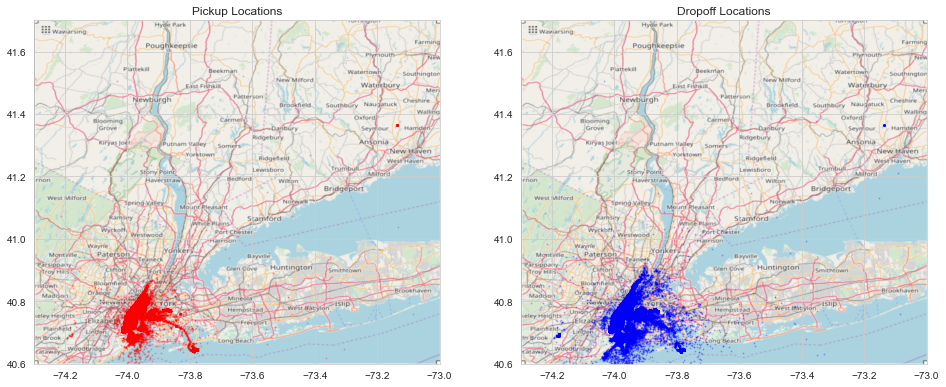

In [39]:
plot_on_map(df_train, BB, nyc_map, s=1, alpha=0.20)

  ### Plotting Testing Data on map

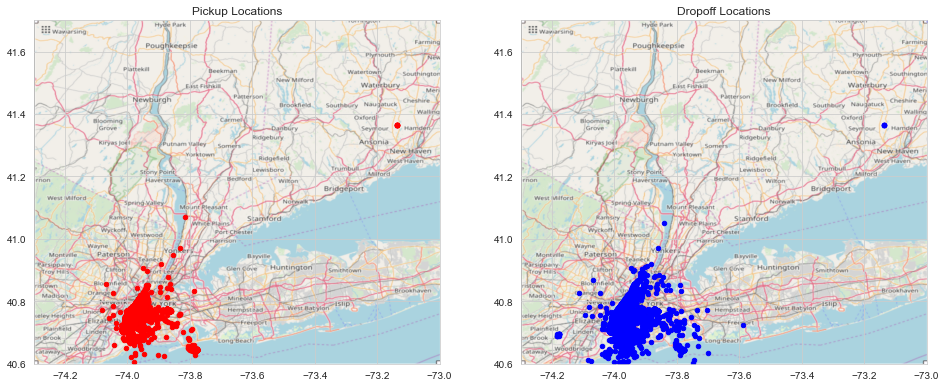

In [38]:
plot_on_map(df_test, BB, nyc_map, alpha=1.0, s=20)

## Scatter plot

In [46]:
def plot_hires(df, BB, figsize=(12, 12), ax=None, c=('r', 'b')):
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=(12, 12))

    idx = select_within_boundingbox(df, BB)
    ax.scatter(df[idx].pickup_longitude, df[idx].pickup_latitude, c=c[0], s=0.01, alpha=0.5)
    ax.scatter(df[idx].dropoff_longitude, df[idx].dropoff_latitude, c=c[1], s=0.01, alpha=0.5)

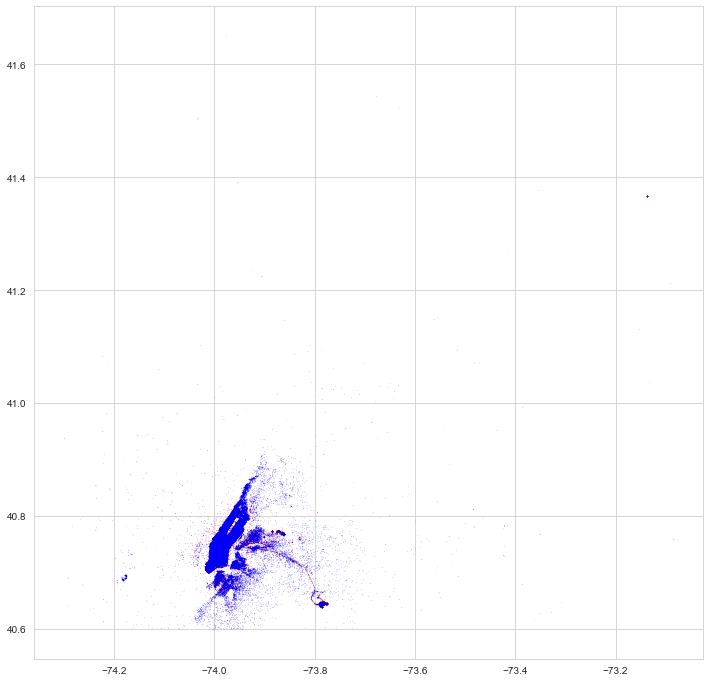

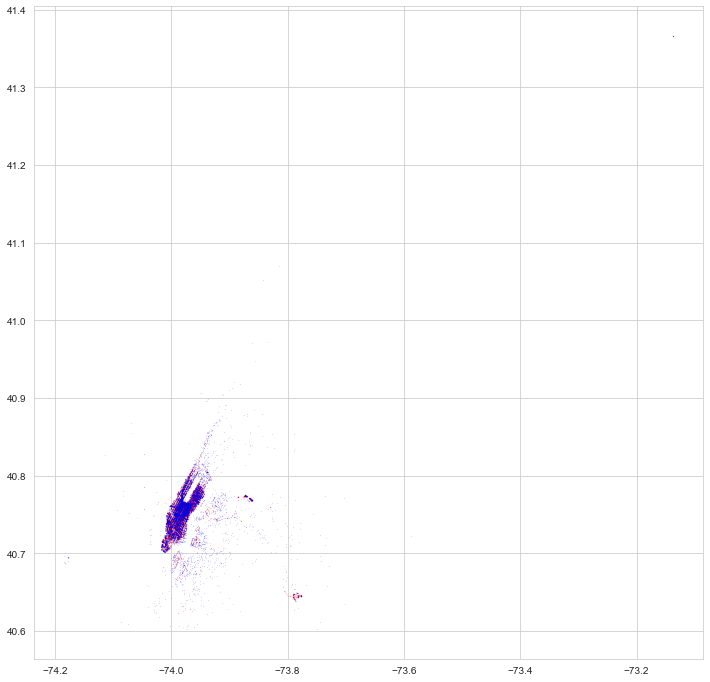

In [48]:
plot_hires(df_train, BB)
plot_hires(df_test, BB)

In [50]:
# add time information
df_train['year'] = df_train["pickup_datetime"].apply(lambda t: t.year)
df_train['weekday'] = df_train["pickup_datetime"].apply(lambda t: t.weekday)
df_train['hour'] = df_train["pickup_datetime"].apply(lambda  t: t.hour)

AttributeError: 'Series' object has no attribute 'appy'

In [54]:
df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,hour
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,0,17
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,16
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,0
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,5,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,7


### *Distance and Time Visualization*

1. **The longer the distance between pickup and dropoff locations, the higher the fare.**
2. **Some trips, like to/from an airport are fixed fee.**
3. **Fare at night is different from the day time.**


### Formula to be used for calculating the distance between latitude and longitude

In [55]:
def distance(lat1, lon1, lat2, lon2):
  p = 0.017453292519943295 # Pi/180
  a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p))/2
  return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

### The longer the distance between pickup and dropoff location, higher the fare. Adding new column to dataframe with distance in miles

In [56]:
df_train['distance_miles'] = distance(df_train['pickup_latitude'], df_train['pickup_longitude'],
                                      df_test['dropoff_latitude'], df_train['dropoff_longitude'])

In [58]:
df_train['distance_miles'].head()

0    1.562150
1    2.724778
2    1.136257
3    1.298615
4    1.735822
Name: distance_miles, dtype: float64

Text(0.5, 1.0, 'Histogram ride distance in miles')

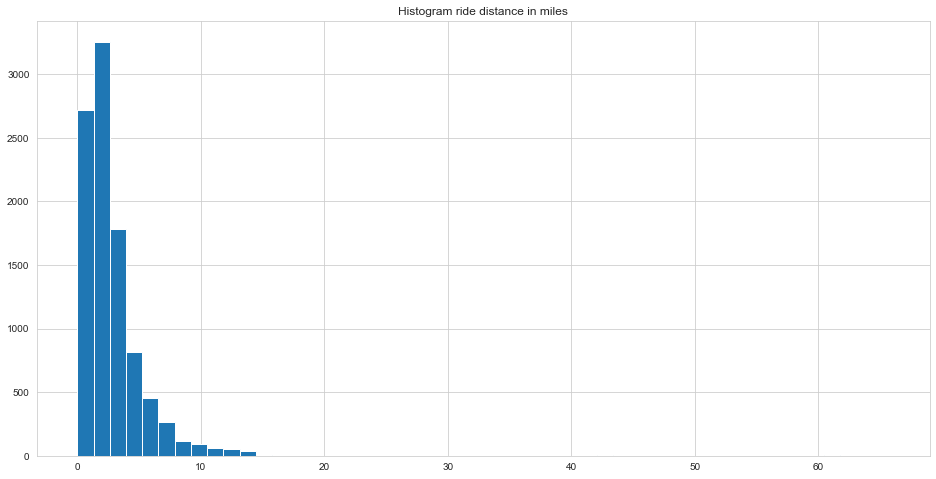

In [63]:
df_train['distance_miles'].hist(bins=50, figsize=(16, 8))
plt.title("Histogram ride distance in miles")

In [64]:
# o fato do minimo ser zero é um problema para nós
df_train["distance_miles"].describe()

count    9690.000000
mean        2.824033
std         2.973704
min         0.012526
25%         1.219922
50%         2.133246
75%         3.481006
max        65.708052
Name: distance_miles, dtype: float64

## It seems most rides are just short rides, with a small peak at ~13 miles. This peak could be due to airport drives.

In [65]:
df_train.groupby("passenger_count")['distance_miles', 'fare_amount'].mean()

C:\Users\thier\AppData\Local\Temp/ipykernel_5468/2669061421.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_train.groupby("passenger_count")['distance_miles', 'fare_amount'].mean()


,distance_miles,fare_amount
passenger_count,,
0,3.397755,9.080659
1,2.802043,11.169553
2,2.952477,11.786048
3,2.784790,11.332867
4,2.750656,11.680824
5,2.836443,11.172870
6,2.669476,12.354238


## Scatter Plot distance vs Fare

Text(0.5, 1.0, 'Zoom in on distance < 15 mile and fare < $100')

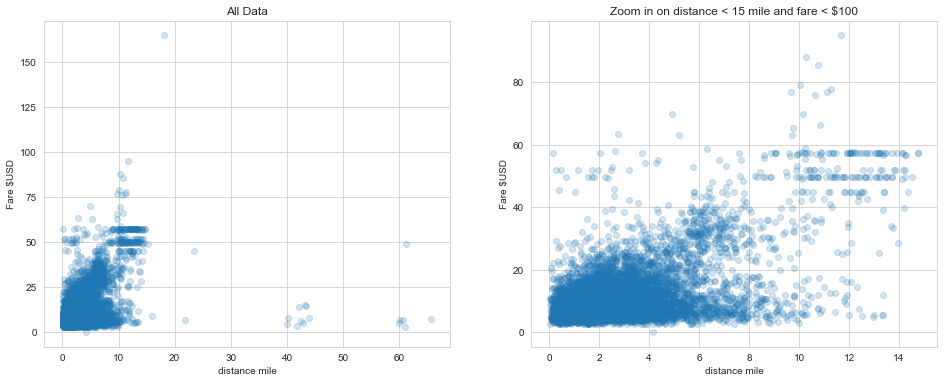

In [67]:
# O que é o comando scatter?

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
axs[0].scatter(df_train["distance_miles"], df_train['fare_amount'], alpha=0.2)
axs[0].set_xlabel("distance mile")
axs[0].set_ylabel("Fare $USD")
axs[0].set_title("All Data")

# Zoom-in some part of the data
idx = ((df_train['distance_miles'] < 15) & (df_train["fare_amount"] < 100))
axs[1].scatter(df_train[idx]["distance_miles"], df_train[idx]["fare_amount"], alpha=0.2)
axs[1].set_xlabel("distance mile")
axs[1].set_ylabel("Fare $USD")
axs[1].set_title("Zoom in on distance < 15 mile and fare < $100")